In [2]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

f = open('/kaggle/input/swiggy-restaurants-dataset/data.json')
data = json.load(f)
f.close()

In [3]:
Cities = list(data.keys())
len(Cities)

623

In [5]:
c = Cities[443]

print('City Name :',c)

#print(data[c].keys())
print('Link :',data[c]['link'])
id = list(data[c]['restaurants'].keys())
print('First Restaurant id            :',id[0])
print('First Restaurant Name          :', data[c]['restaurants'][id[0]]['name'])
print('First Restaurant Rating        :', data[c]['restaurants'][id[0]]['rating'])
print('First Restaurant Rating_Counts :', data[c]['restaurants'][id[0]]['rating_count'])
print('First Restaurant Cost          :', data[c]['restaurants'][id[0]]['cost'])
print('First Restaurant Address       :', data[c]['restaurants'][id[0]]['address'])
print('First Restaurant Cuisine       :', data[c]['restaurants'][id[0]]['cuisine'])
print('First Restaurant License No.   :', data[c]['restaurants'][id[0]]['lic_no'])

Menu = list(data[c]['restaurants'][id[0]]['menu'].keys())
print('*'*45,data[c]['restaurants'][id[0]]['name'],',',c,'- Menu','*'*45)

for item in Menu:
    print(item)
    Sub_menu = list(data[c]['restaurants'][id[0]]['menu'][item].keys())
    for sub_item in Sub_menu :
        print(sub_item,'>>> Price :',data[c]['restaurants'][id[0]]['menu'][item][sub_item]['price'], end =' | ')
        print('veg_or_non_veg :',data[c]['restaurants'][id[0]]['menu'][item][sub_item]['veg_or_non_veg'])
    print('-'*100)
       
                                                          
print('First Restaurant Link          :',data[c]['restaurants'][id[0]]['link'])

City Name : Palani
Link : https://www.swiggy.com/city/palani
First Restaurant id            : 422331
First Restaurant Name          : Madurai Famous Jigarthanda
First Restaurant Rating        : 3.5
First Restaurant Rating_Counts : 20+ ratings
First Restaurant Cost          : ₹ 100
First Restaurant Address       : Madurai Famous Jigarthanda, no.4,v.o.c.busstand complex,palani
First Restaurant Cuisine       : Beverages
First Restaurant License No.   : 22421415000516
********************************************* Madurai Famous Jigarthanda , Palani - Menu *********************************************
Beverages
Mini Jigarthanda >>> Price : 60 | veg_or_non_veg : Veg
Basanthi >>> Price : 110 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
First Restaurant Link          : https://www.swiggy.com/restaurants/madurai-famous-jigarthanda-palani-palani-422331


In [6]:
Data = pd.DataFrame()                               # Create an Empty Dataframe

for city in Cities:
    try:
        # Convert the city-wise restaurant data to pandas Dataframe
        DF = pd.DataFrame(data[city]['restaurants']).T  
        
        City = [city for i in range(DF.shape[0])]
        DF['City'] = City
        SubRegion = City                                          
        DF['SubRegion'] = SubRegion
        Data = pd.concat([Data,DF])
        
    except:
        
        Subregions = list(data[city].keys())
        for region in Subregions:
            
            
            DF = pd.DataFrame(data[city][region]['restaurants']).T
            City = [city for i in range(DF.shape[0])]
            
            DF['City'] = City
            
            SubRegion = [region for i in range(DF.shape[0])]
            
            DF['SubRegion'] = SubRegion
            Data = pd.concat([Data,DF])

In [7]:
Data.shape

(181404, 13)

In [8]:
def Menu(Data, i):
    Menu = list(Data.menu[i].keys())
    print('*'*35,Data['name'][i],',',Data['SubRegion'][i],Data['City'][i],'- Menu','*'*35)

    for item in Menu:
        print(item)
        Sub_menu = list(Data.menu[i][item].keys())
        for sub_item in Sub_menu :
            print(sub_item,'>>> Price :',Data.menu[i][item][sub_item]['price'], end =' | ')
            print('veg_or_non_veg :',Data.menu[i][item][sub_item]['veg_or_non_veg'])
        print('-'*100)
        
Menu(Data, 11223)

*********************************** Food Decker , Koramangala Bangalore - Menu ***********************************
Pasta
Fried Chicken Maggi >>> Price : 100 | veg_or_non_veg : Non-veg
Fried Veg Maggi >>> Price : 80 | veg_or_non_veg : Veg
Egg Maggi >>> Price : 80 | veg_or_non_veg : Non-veg
Veg Maggi >>> Price : 60 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Sandwiches
Chicken Fried Sandwich >>> Price : 150 | veg_or_non_veg : Non-veg
Chicken Sandwich >>> Price : 100 | veg_or_non_veg : Non-veg
Bread Butter Cheese >>> Price : 60 | veg_or_non_veg : Veg
Aloo Cheese Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg  Cheese Grill Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg Sandwich >>> Price : 80 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Rolls
Chowmein Roll >>> Price : 100 | veg_or_non_veg : Veg
Malai Tikka Roll >>> Price : 

In [9]:
Data.to_csv('Swiggy_data.csv')

In [10]:
df = pd.read_csv('Swiggy_data.csv')

In [11]:
df = df.rename(columns={'Unnamed: 0':'id', 'name':'Restaurant'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
#df.set_index('id', inplace=True)
df.shape

(160621, 14)

In [12]:
df = df.loc[:,['id','Restaurant','City','SubRegion','cost','cuisine','rating','rating_count','lic_no',
               'address','menu','link', 'type', 'price']]
df.head()

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link,type,price
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",--,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...,NaN,NaN
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...",{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...,NaN,NaN
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city",{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...,NaN,NaN
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...,NaN,NaN
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",--,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...,NaN,NaN


In [13]:
#How many cities (including subregions) where Swiggy is having its restaurants listed?
df['SubRegion'].nunique()

835

In [14]:
#How many cities (don't include subregions) where Swiggy is having its restaurants listed?
df['City'].nunique()

554

In [15]:
#The Subregion of Delhi with the maximum number of restaurants listed on Swiggy?
d = df[df.City == 'Delhi']
d.groupby('SubRegion')['Restaurant'].count().sort_values(ascending=False).reset_index(name='Restaurants counts').head().style.background_gradient()

,SubRegion,Restaurants counts
0,Indirapuram,1279
1,Rohini,1135
2,Greater Kailash 2,1038
3,Laxmi Nagar,933
4,Malviya Nagar,900


In [16]:
Null = df.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/df.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False).style.background_gradient()


,index,Null,% Null
12,type,148591,93.000000
13,price,148590,93.000000
4,cost,12177,8.000000
5,cuisine,12145,8.000000
7,rating_count,12132,8.000000
8,lic_no,12274,8.000000
9,address,12132,8.000000
10,menu,12031,7.000000
0,id,0,0.000000
1,Restaurant,101,0.000000


In [17]:
df = df.drop(['type','price'], axis =1)
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148290, 12)

In [18]:
#List out the top 5 Restaurants with Maximum & minimum ratings throughout the dataset.
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))     
    except:
        #print(Data.rating[i])
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)                # Where rating is not givem keep it null
        else:
            print(df.rating[i])
print(len(Rating))
print(df.shape[0])
df.rating = Rating
df.rating.dtypes

148290
148290


dtype('float64')

In [19]:
print('The maximum rating Restaurant are:')
df[df.rating ==df.rating.max()][['Restaurant', 'rating']].head(5)

The maximum rating Restaurant are:


,Restaurant,rating
757,Pablo Premium Kitchen,5.0
1021,The best diet corner,5.0
9758,Creams and Bites,5.0
9808,Bansal's Thali & Combo Meals,5.0
10239,GOWHEY- HEALTHY DESSERT COMPANY,5.0


In [20]:
print('The minimum rating Restaurant are:')
df[df.rating==df.rating.min()][['Restaurant', 'rating']].head(5)

The minimum rating Restaurant are:


,Restaurant,rating
34240,Ice Cream and Shakes Co,1.0


In [21]:
#Name of top 5 cities with the highest number of restaurants listed.
B = df.City.value_counts(ascending=False).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1)

B[B['Counts']<=B['Counts'].max()].head(5)

,City,Counts
0,Bangalore,15288
1,Delhi,14048
2,Pune,12412
3,Hyderabad,9996
4,Chennai,9940


In [22]:
import plotly.express as px
import plotly.offline as pyo

In [23]:

#Top 10 cities as per the number of restaurants listed?
Top = df.City.value_counts(ascending=False).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1).head(10)

fig =px.bar(Top,
            x= 'City',
            y= 'Counts',
            labels = {'Counts':'Restaurants Counts'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.sequential.Viridis,
            title='<b>Top 10 Cities Restaurants listed')

fig.show()
pyo.plot(fig, filename = 'Top 10 Cities w.r.t Restaurants listed.html', auto_open = True)

'Top 10 Cities w.r.t Restaurants listed.html'

In [24]:
#Name the top 5 Most Popular Restaurants in Pune.
d = df[df.City == 'Pune']
df[df.rating==df.rating.max()][['Restaurant', 'rating']].head(5)

,Restaurant,rating
757,Pablo Premium Kitchen,5.0
1021,The best diet corner,5.0
9758,Creams and Bites,5.0
9808,Bansal's Thali & Combo Meals,5.0
10239,GOWHEY- HEALTHY DESSERT COMPANY,5.0


In [25]:
#Which SubRegion in Delhi is having the least expensive restaurant in terms of cost?
d = df[df.City == 'Delhi']
df[df.cost==df.cost.min()][['SubRegion','cost']]

,SubRegion,cost
17457,Battarahalli,₹ 1
17701,Basaveshwaranagar,₹ 1
18505,"Sanjay Nagar, New BEL Road",₹ 1
19297,Majestic,₹ 1
28169,Biharsharif,₹ 1
28197,Biharsharif,₹ 1
31833,Zirakpur,₹ 1
32069,Zirakpur,₹ 1
32248,East Chd,₹ 1
33252,South Mohali,₹ 1


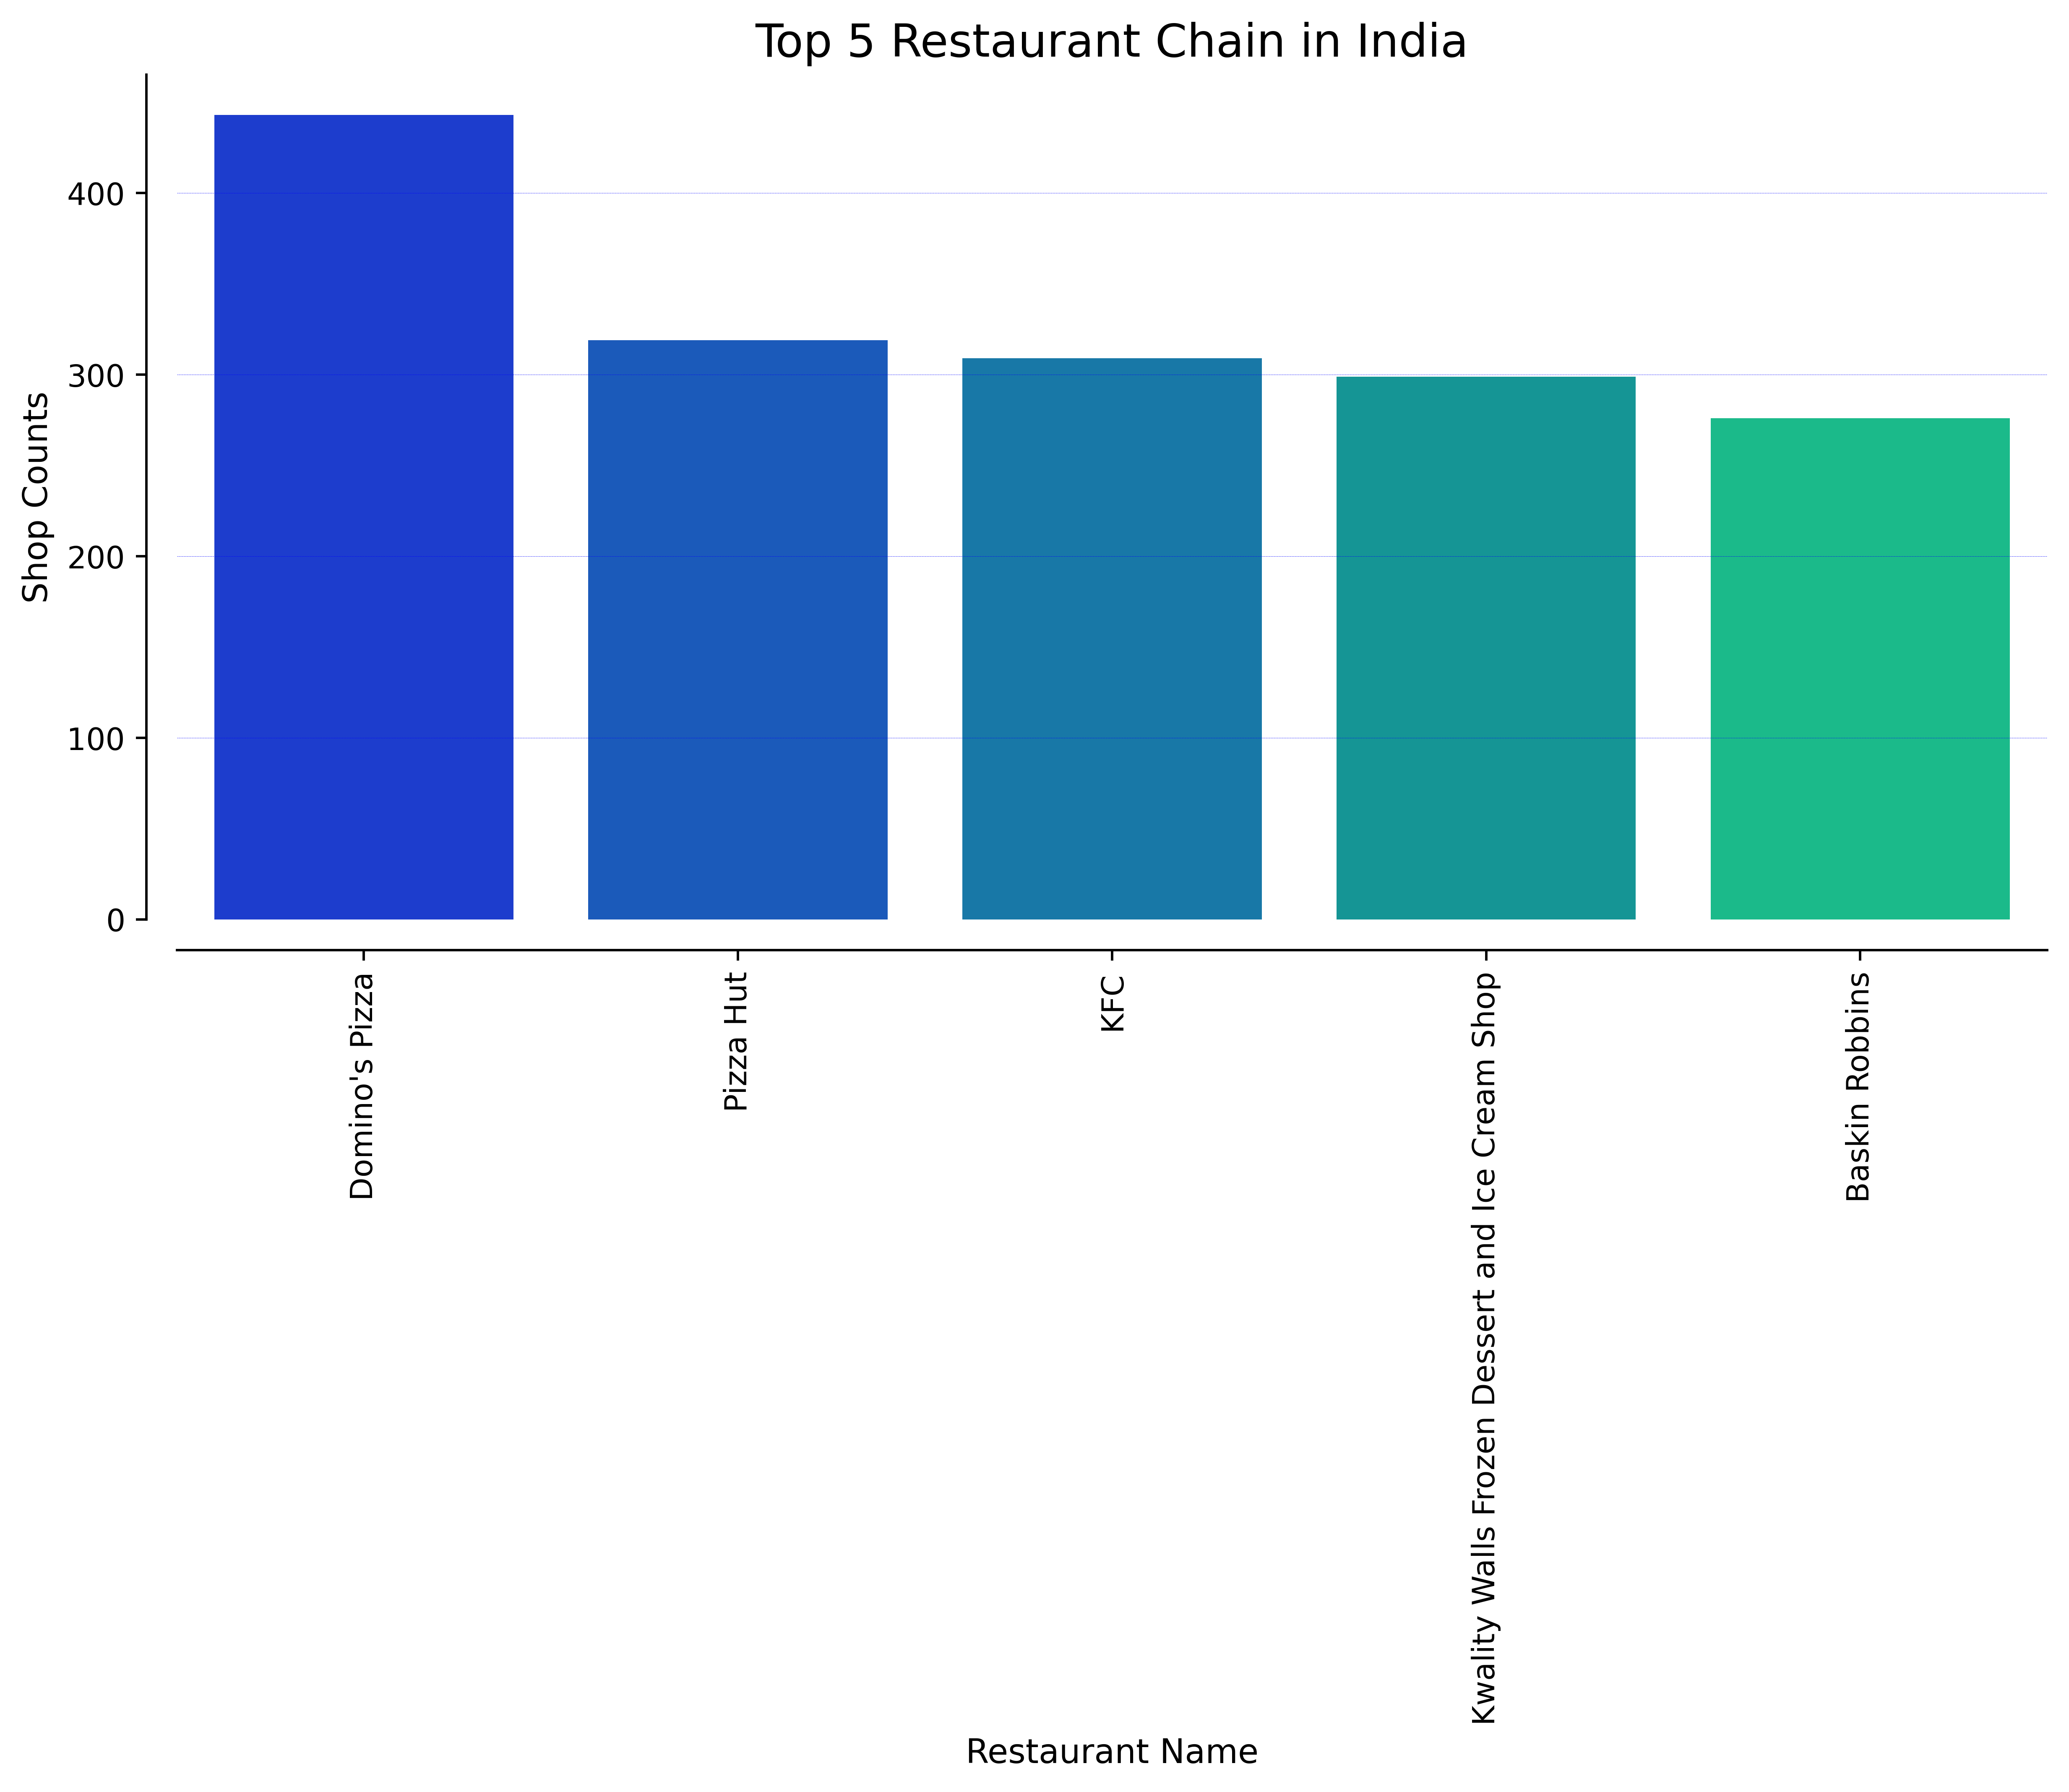

In [26]:
#Top 5 most popular restaurant chains in India?
d = df.groupby('Restaurant', as_index=False).agg('count')[['Restaurant', 'id']].sort_values(by='id', ascending = False)

# Adjust the size and view of plot
plt.figure(figsize=(11,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = d.head(),
           x='Restaurant',
           y = 'id',
           palette= "winter" 
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y', 
           color = 'blue', 
         linestyle = '--',  
         linewidth=0.1
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
                                   
plt.xticks(rotation = 90)  
plt.xlabel("Restaurant Name", fontsize = 11)                             # Set X label         
plt.ylabel("Shop Counts", fontsize = 11)                                 # Set Y label
plt.title('Top 5 Restaurant Chain in India', fontsize = 15)              # Set title
plt.show()

In [27]:
#Which restaurant in Pune has the most number of people visiting?
df.rating_count.unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [30]:
review = {}
for rating in df.rating_count.unique():
    if rating == 'Too Few Ratings':
        review[rating] = 0
    else:
        try:
            review[rating] = int(rating.split('+')[0])
        except:
            if rating.split('+')[0][-1] == 'K':
                review[rating] = int(rating.split('+')[0][:-1])*1000
review

{'Too Few Ratings': 0,
 '50+ ratings': 50,
 '100+ ratings': 100,
 '20+ ratings': 20,
 '500+ ratings': 500,
 '1K+ ratings': 1000,
 '5K+ ratings': 5000,
 '10K+ ratings': 10000}

In [31]:
reviews = []
for i in range(df.shape[0]):
    reviews.append(review[df.rating_count[i]])
print(len(reviews))
print(df.shape[0])

df['Reviews'] = reviews

148290
148290


In [32]:
d = df.sort_values(by = 'Reviews', ascending=False)[['Restaurant', 'City','rating','Reviews']]
d[d.City == 'Pune'].head(10)

,Restaurant,City,rating,Reviews
122173,Kinara's Maratha Darbar,Pune,4.1,1000
132448,Irani Cafe,Pune,4.3,1000
128741,Burger King,Pune,4.0,1000
129987,McDonald's,Pune,4.2,1000
132389,Godavari Snacks,Pune,4.2,1000
132396,Satguru's Punjabi Rasoi,Pune,4.1,1000
130033,Ashapuri Dining Hall,Pune,3.9,1000
132404,Bebe Di Rasoi - Punjabi,Pune,4.1,1000
121308,McDonald's,Pune,4.2,1000
130046,Pind Punjab.,Pune,4.1,1000


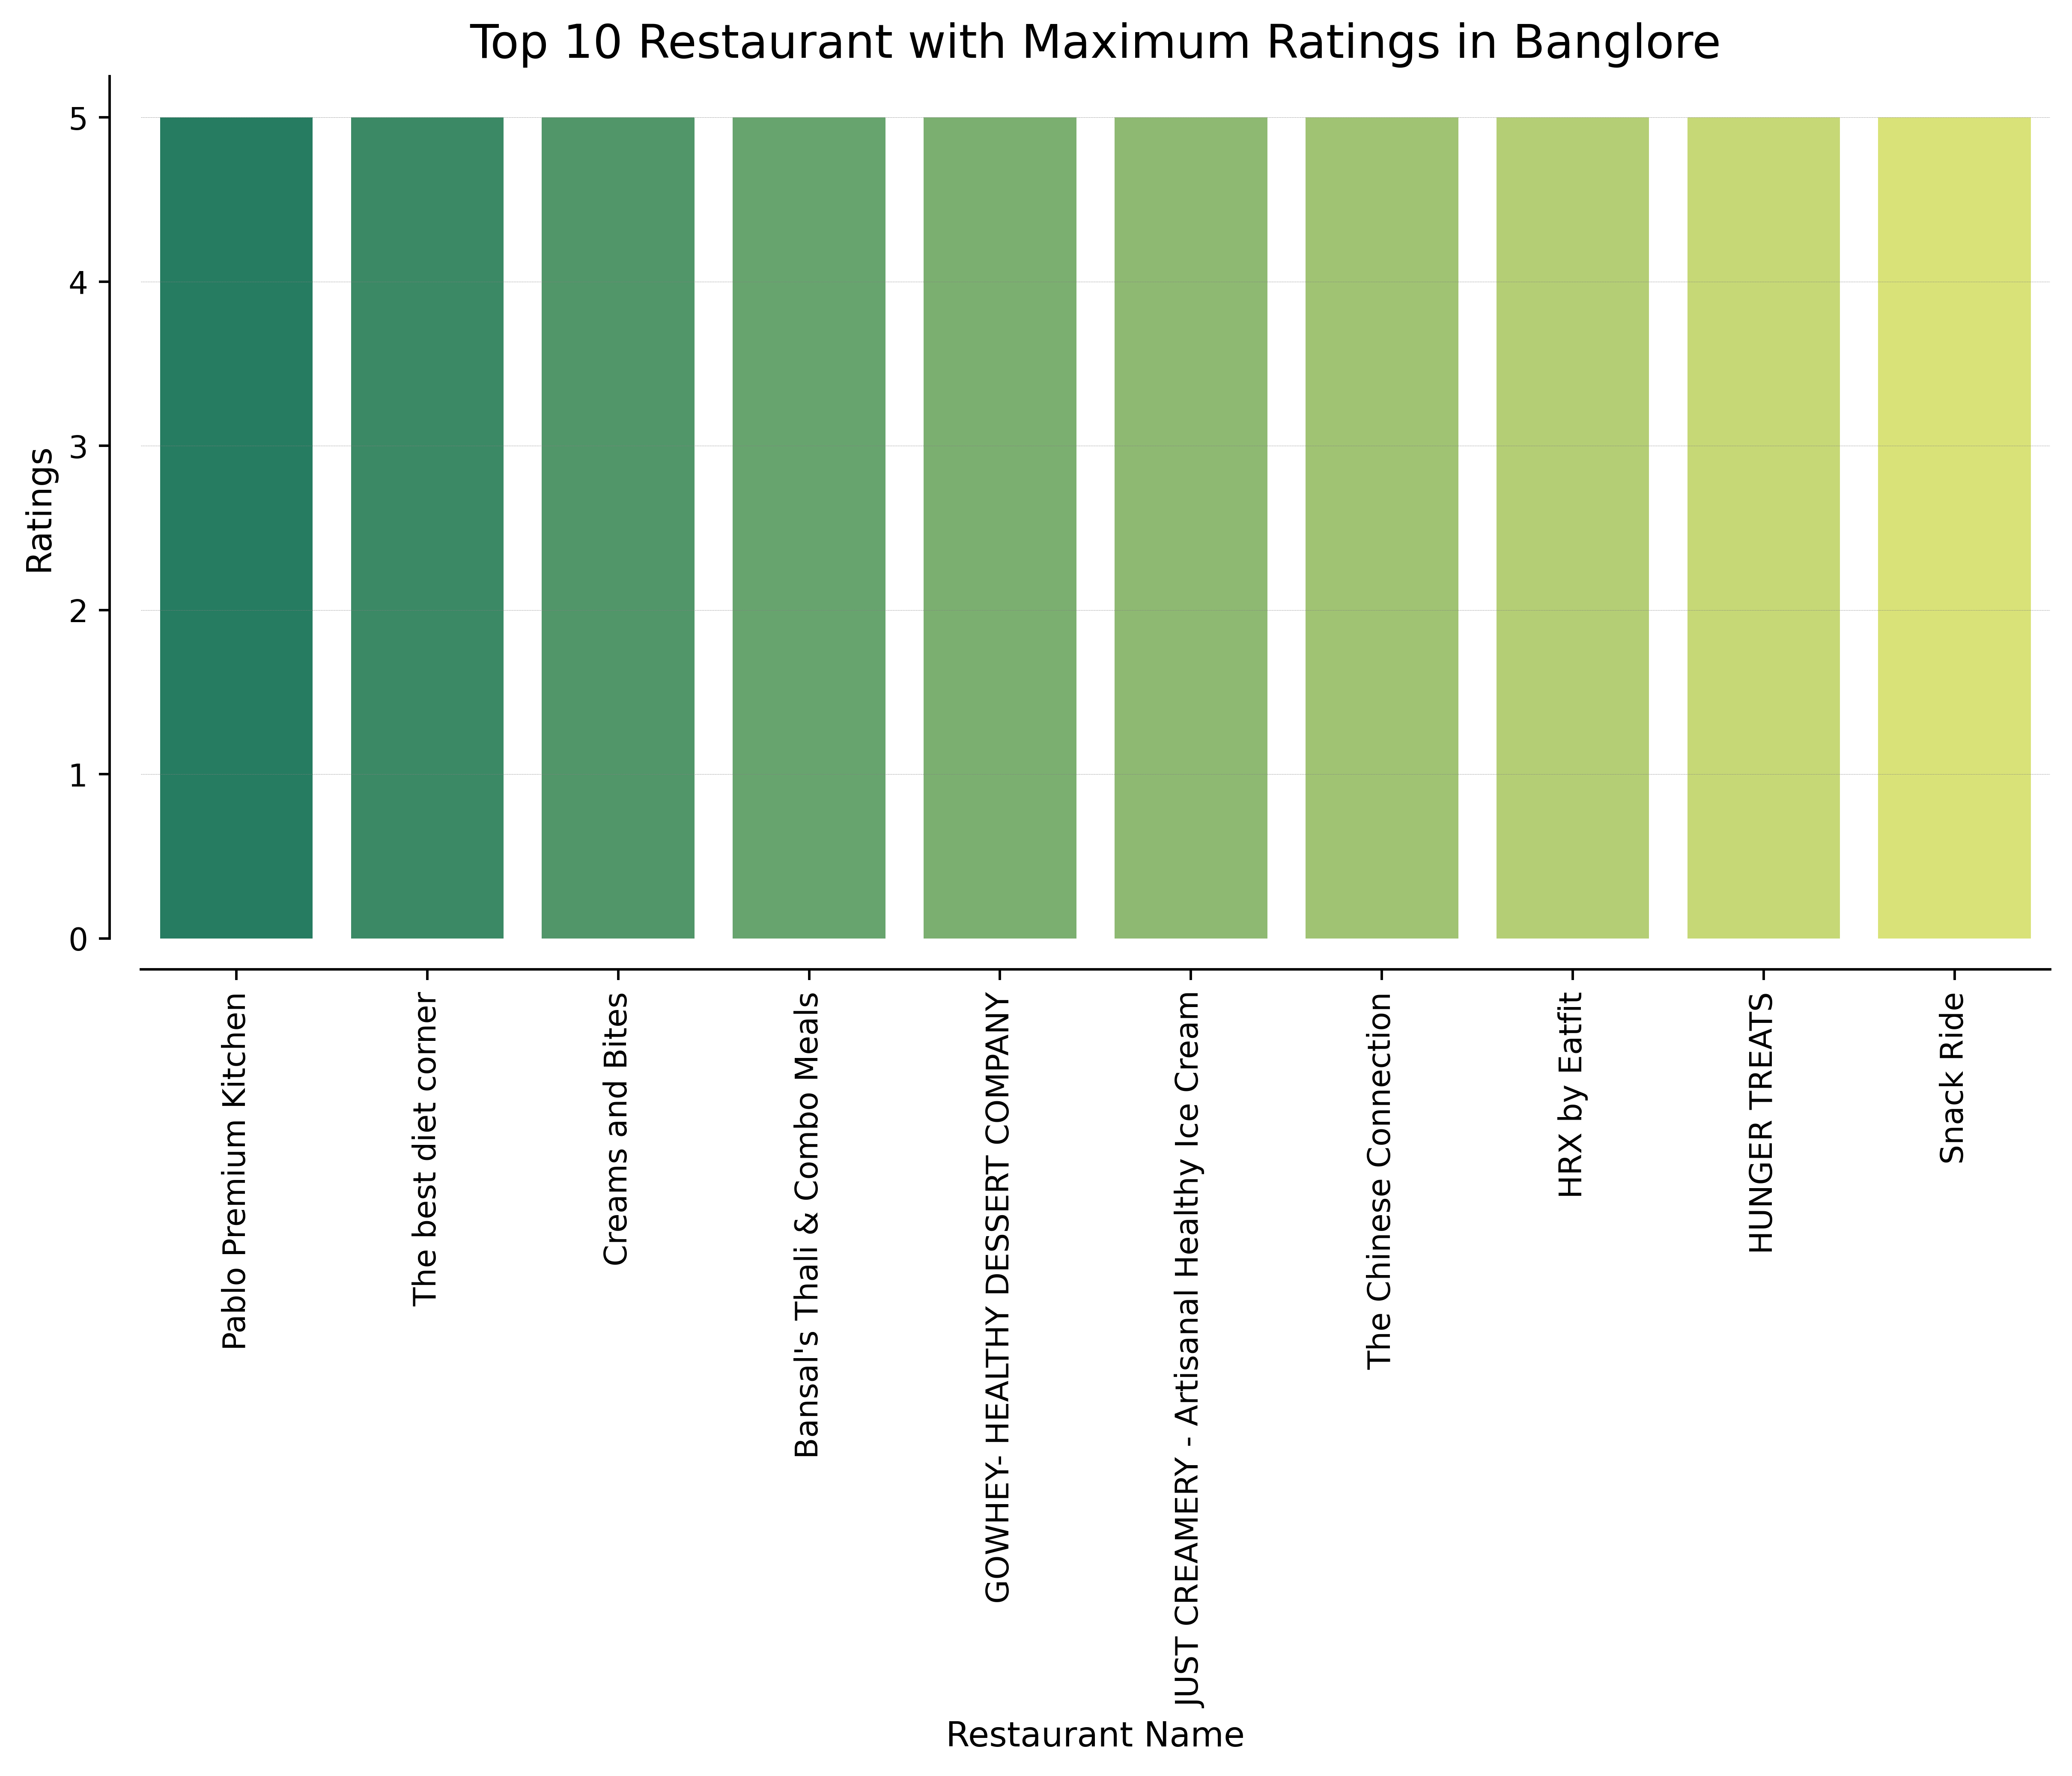

In [33]:
#Top 10 Restaurants with Maximum Ratings in Banglore
d = df[df.City == 'Bangalore']
d=df[df.rating==df.rating.max()][['Restaurant','rating']]
plt.figure(figsize=(11,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = d.head(10),
           x='Restaurant',
           y = 'rating',
           palette= "summer" 
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y', 
           color = 'gray', 
         linestyle = '--',  
         linewidth=0.1
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
                                   
plt.xticks(rotation = 90)  
plt.xlabel("Restaurant Name", fontsize = 11)                             # Set X label         
plt.ylabel("Ratings", fontsize = 11)                                 # Set Y label
plt.title('Top 10 Restaurant with Maximum Ratings in Banglore', fontsize = 15)              # Set title
plt.show()

In [34]:
#Top 10 Restaurant in Patna w.r.t rating
Pune = df[df['City'] == 'Pune']
Pune[Pune['rating'] == Pune['rating'].max()][['Restaurant','City','rating']]



,Restaurant,City,rating
120604,The Samosa Man,Pune,5.0
122077,HRX by Eatfit,Pune,5.0
127537,CIRCLE OF CRUST,Pune,5.0
128092,Smoodies & Juices: Your Fruitfully,Pune,5.0
128253,HRX by Eatfit,Pune,5.0
128626,HRX by Eatfit,Pune,5.0
128916,Paratha Box by EatFit,Pune,5.0
129056,Smoodies & Juices: Your Fruitfully,Pune,5.0
129166,HRX by Eatfit,Pune,5.0
130266,Miss Gelato,Pune,5.0


In [35]:
Top = df.City.value_counts(ascending=False).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1).head(10)

fig =px.bar(Pune.sort_values(by='rating',ascending = False).head(10),
            x= 'Restaurant',
            y= 'rating',
            labels = {'Restaurant':'Top 10 Restaurants in Pune','rating':'Rating'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.sequential.Viridis,
            title='<b>Top 10 Restaurant in Pune w.r.t rating')

fig.show()

pyo.plot(fig, filename = 'Top 10 Restaurant in Pune w.r.t rating.html', auto_open = True)

'Top 10 Restaurant in Pune w.r.t rating.html'